# Introduction: Interacting with Slack from Python

In this notebook, we will use `Slacker` to interact with Slack. This allows us to send messages and upload files, which can be useful when training models, or monitoring scripts (or just for fun of course)!

In [1]:
!pip install -q -U Slacker

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)",)': /simple/slacker/
cloudfoundry-client 0.0.25 has requirement protobuf==2.6.1, but you'll have protobuf 3.6.1 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd

# Slacker 
from slacker import Slacker

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Get a Slack Legacy API Token

https://api.slack.com/custom-integrations/legacy-tokens

Store in a safe location (not on GitHub)!

## Authenticate with Slack

Read in slack api token. Replace the line below with the location of your slack api token.

In [3]:
with open('C:/Users/willk/OneDrive/Desktop/slack_api_python.txt', 'r') as f:
    slack_api_token = f.read()

Authenticate with slack and print out channels to make sure everything worked.

In [4]:
# Connect to Slack
slack = Slacker(slack_api_token)
channels = slack.channels.list()

for channel in channels.body['channels']:
    print(f'Channel {channel["name"]} Purpose: {channel["purpose"]["value"]} ID: {channel["id"]}\n')

Channel general Purpose: This channel is for workspace-wide communication and announcements. All members are in this channel. ID: CCCT28F08

Channel python_content Purpose:  ID: CCEG5VCEM

Channel python_content2 Purpose:  ID: CCEBQSWHW

Channel random Purpose: A place for non-work-related flimflam, faffing, hodge-podge or jibber-jabber you'd prefer to keep out of more focused work-related channels. ID: CCDP3ES85

Channel slack_interaction Purpose: To interact with Slack from Python ID: CCDC464LU

Channel testing_exp Purpose: Experimental testing of interactions. ID: CCD27690R



# Options

Anything you can do in Slack itself, you can do with `Slacker`. Let's take a look at the options.

In [133]:
from pprint import pprint

command_dict = {'functions': {},
                'attributes': {}}

# Modules
for d in dir(slack):
    if not d.startswith('_'):
        command_dict['functions'][d] = []
        command_dict['attributes'][d] = []
        # Iterate through methods and attributes
        for dd in dir(getattr(slack, d)):
            if not dd.startswith('_'):
                # List of methods and attributes
                l = dir(getattr(getattr(slack, d), dd))
                # Method (function)
                if '__call__' in l:
                    command_dict['functions'][d].append(dd)
                # Attributes
                else:
                    command_dict['attributes'][d].append(dd)
                    
pprint(command_dict['functions']['users'])

['get',
 'get_presence',
 'get_user_id',
 'identity',
 'info',
 'list',
 'post',
 'set_active',
 'set_presence']


Let's see how to use one of these. Here we'll list the users and some information.

In [134]:
r = slack.users.list()
for member in r.body['members']:
    print(f"Real name: {member['real_name']:12} Time Zone: {member['tz']} Status: {member['profile']['status_text']}")

Real name: Will Koehrsen Time Zone: America/New_York Status: Running
Real name: slackbot     Time Zone: None Status: 


`r` is a response object. For each method, there will be different pieces of information you can retrieve.

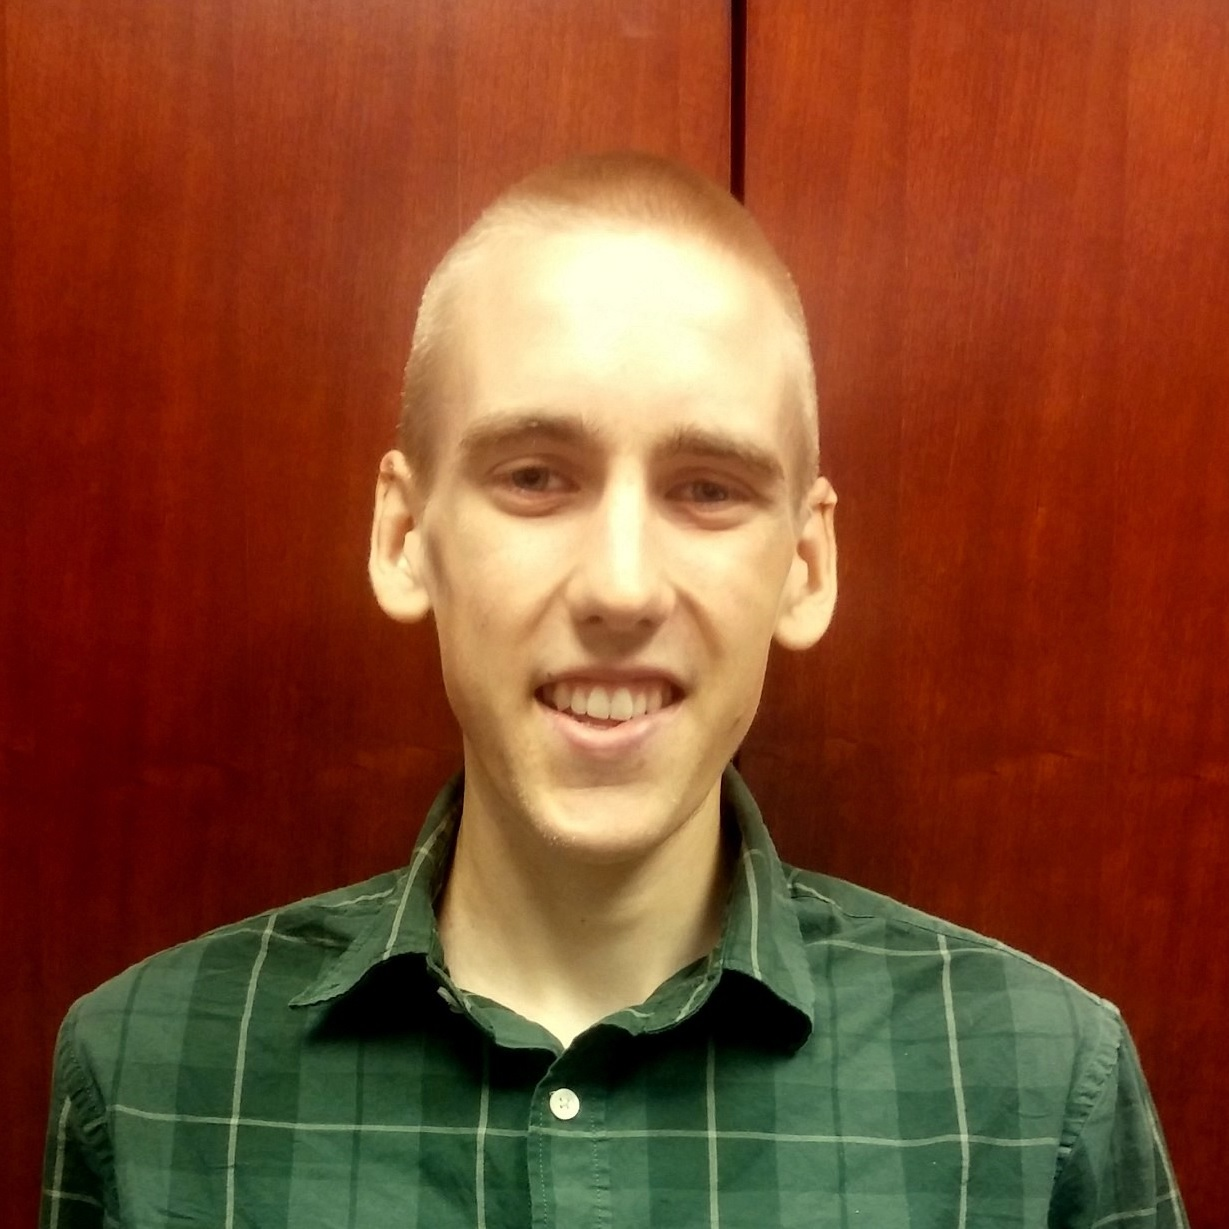

In [158]:
from IPython.display import Image

r = slack.users.list()
img_url = r.body['members'][0]['profile']['image_original']
Image(url=img_url, embed=True)

In [138]:
r.body['members'][0]['profile']['title']

'Not much.'

Of course, we can change this title if we are happy with it! 

In [139]:
users = slack.users
r = users.profile.set(user=users.get_user_id('wjk68'), 
                      name='title', 
                      value = 'Data Scientist and Writer')
r.successful

True

In [143]:
r = slack.users.list()
r.body['members'][0]['profile']['title']

'Data Scientist and Writer'

# Posting Messages

We can post messages very simply.

In [144]:
r = slack.chat.post_message(channel = 'python_content', 
                            text = 'Have a great day!',
                            username = 'Python Test',
                            icon_url = 'http://devarea.com/wp-content/uploads/2017/11/python-300x300.png')
r.successful

True

![](images/posted_message.PNG)

We can also post as ourselves.

In [145]:
r = slack.chat.post_message(channel = 'python_content', 
                            text = 'Anyone up for a trip to the store?',
                            as_user = 'willk')
r.successful

True

![](images/my_posted_message.PNG)

We can also upload files.

In [163]:
r = slack.files.upload(file_ = 'images/volcano_crater.jpg',
                   channels= ['random'], title = 'Volcano Crater',
                   initial_comment = 'This would make a great display background')
r.successful

True

In [170]:
img_url = r.body['file']['thumb_480']
img_url

'https://files.slack.com/files-tmb/TCD256PSM-FEGL1VBS9-f34350e974/volcano_crater_480.jpg'

In [172]:
Image(url=img_url)

# Creating a New Channel

In [173]:
slack.channels.create('python_content3')
new_id = slack.channels.get_channel_id('python_content3')
r = slack.channels.history(new_id)
r.body

{'ok': True,
 'messages': [{'user': 'UCEKVNHPH',
   'type': 'message',
   'subtype': 'channel_join',
   'ts': '1543598220.000200',
   'text': '<@UCEKVNHPH> has joined the channel'}],
 'has_more': False}

In [176]:
r = slack.channels.history(slack.channels.get_channel_id('random'))
r.body['messages'][0]

{'type': 'message',
 'text': 'This would make a great display background',
 'files': [{'id': 'FEGL1VBS9',
   'created': 1543597988,
   'timestamp': 1543597988,
   'name': 'volcano_crater.jpg',
   'title': 'Volcano Crater',
   'mimetype': 'image/jpeg',
   'filetype': 'jpg',
   'pretty_type': 'JPEG',
   'user': 'UCEKVNHPH',
   'editable': False,
   'size': 226569,
   'mode': 'hosted',
   'is_external': False,
   'external_type': '',
   'is_public': True,
   'public_url_shared': False,
   'display_as_bot': False,
   'username': '',
   'url_private': 'https://files.slack.com/files-pri/TCD256PSM-FEGL1VBS9/volcano_crater.jpg',
   'url_private_download': 'https://files.slack.com/files-pri/TCD256PSM-FEGL1VBS9/download/volcano_crater.jpg',
   'thumb_64': 'https://files.slack.com/files-tmb/TCD256PSM-FEGL1VBS9-f34350e974/volcano_crater_64.jpg',
   'thumb_80': 'https://files.slack.com/files-tmb/TCD256PSM-FEGL1VBS9-f34350e974/volcano_crater_80.jpg',
   'thumb_360': 'https://files.slack.com/files-tm

In [179]:
slack.channels.set_purpose(slack.channels.get_channel_id('random'), 
                           'Deep philosophical discussions around the water cooler.')
slack.channels.set_purpose(slack.channels.get_channel_id('python_content3'), 
                           'Sharing great python related resources')

channels = slack.channels.list()

for channel in channels.body['channels']:
    print(f'Channel {channel["name"]} Purpose: {channel["purpose"]["value"]}\n')

Channel general Purpose: This channel is for workspace-wide communication and announcements. All members are in this channel.

Channel python_content Purpose: 

Channel python_content2 Purpose: 

Channel python_content3 Purpose: Sharing great python related resources

Channel random Purpose: Deep philosophical discussions around the water cooler.

Channel slack_interaction Purpose: To interact with Slack from Python

Channel testing_exp Purpose: Experimental testing of interactions.



In [ ]:
from PIL import Image
import requests
url = user['profile']['image_192']
im = Image.open(requests.get(url, stream=True).raw)
plt.imshow(im)

In [ ]:
PIL.Image.from

In [185]:
user['profile']['image_192']

'https://a.slack-edge.com/66f9/img/slackbot_192.png'

In [194]:
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


User: wjk68, Real Name: Will Koehrsen, Time Zone: Eastern Standard Time.
Current Status: Running


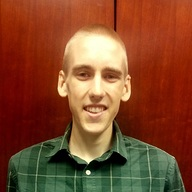


User: slackbot, Real Name: slackbot, Time Zone: Pacific Standard Time.
Current Status: 


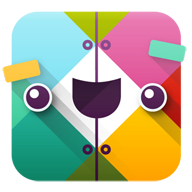

In [198]:
from IPython.display import Image

users = slack.users.list()

for user in users.body['members']:
    # Print some information
    print(f'\nUser: {user["name"]}, Real Name: {user["real_name"]}, Time Zone: {user["tz_label"]}.')
    print(f'Current Status: {user["profile"]["status_text"]}')
    # Get image data and show
    Image(user['profile']['image_192'])

In [ ]:
slack.files.upload('first_plot.png', channels = ['testing_exp', 'slack_interaction']);